## Ejemplos de distintos tipos de visualizaciones con datos de la NBA.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.offsetbox import  OffsetImage
import seaborn as sns
sns.set_style("whitegrid")

import math
import random 

import urllib.request
import requests
from urllib.request import urlretrieve

from IPython.core.display import display, HTML
from IPython.display import IFrame

In [36]:
# funciones necesarias

# función para cargar los datos en un dataframe y ver el tamaño y sus columnas/atributos
def cargar_datos(data):
    df = pd.read_csv('./'+data, sep=',')
    print("Dataset: num_rows: %d\tColumnas: %d\n" % (df.shape[0], df.shape[1]))
    print("columns:\n", list(df.columns))
    
    return df


# función para conseguir la imagen de un jugador desde la web de stats de la NBA. Hay que conocer el ID del
# jugador en cuestión en la web
def conseguir_imagen(player_id):
    pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/"+player_id+".png",\
                                     player_id+".png")

    img_player = plt.imread(pic[0])
    plt.imshow(img_player)
    
    return img_player


# función que le pasamos un dataframe, el tipo de visualización y el atributo del DF por el que agrupar los
# datos.
def grouped_plot(df, feature, tipo):
    groups = df.groupby(feature)
    colors = cm.Set1(np.linspace(0,1,len(groups)))
    
    for g, c in zip(groups, colors):
        # fallos en el lanzamiento
        if tipo==0:
            plt.scatter(g[1].lon, g[1].lat, color=c, s=3, marker='X', alpha=0.5)
        # aciertos en el lanzamiento
        else:
            plt.scatter(g[1].lon, g[1].lat, color=c, s=3, alpha=0.5)

            
# función que muestra un gráfico con los datos agrupados por un atributo, además también se muestran los datos
# de dicho atributo por un rango o segmentación de los valores.
def grafico_segmentacion(df, atributo, rango, titulo, label_x, label_y):
    # con el atributo y el rango de valores se hace la segmentación
    segmento = pd.cut(df[atributo], rango)
    # se muestra por pantalla los valores por cada valor del rango
    print(pd.value_counts(segmento))

    # Creando el grafico de barras desde pandas
    plot = pd.value_counts(segmento).plot(kind='bar', title=titulo)
    plot.set_ylabel(label_y)
    plot.set_xlabel(label_x)
    
    plt.show()


# función que muestra un gráfico enfrentando dos atributos: agrupando por uno y calculando los valores medios 
# del otro atributo.
def grafico_medias(df, atributo1, atributo2, title):
    # mostramos los valores del atributo principal por el que se agrupa
    print(pd.value_counts(df[atributo1]))
    
    count = pd.DataFrame(df.groupby(atributo1)[atributo2].mean()).reset_index()

    plt.figure(figsize=(15, 10))
    _ = sns.barplot(data=count, x=atributo1, y=atributo2)
    plt.title(title)
    
    plt.show()


# función para pintar sobre la cancha y en base a los atributos de localización desde donde se han realizado
# los distintos lanzamientos.
def grafico_localizacion(tam_x, tam_y, df1, df2, atributo, x, y, x2, y2, title1, title2):
    plt.figure(figsize=(tam_x,tam_y))

    colors_1 = np.where(df1[atributo]==1, 'Green', 'Red');
    colors_2 = np.where(df2[atributo]==1, 'Green', 'Red');
    
    # primer gráfico para mostrar las canastas en base a unos datos de localización, valor x e y
    plt.subplot(121)
    plt.title(title1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df1[x], df1[y], color=colors_1, s=4, alpha=0.5)
    # segundo gráfico para mostrar las canastas en base a unos datos de localización, aquí con longitud y latitud
    plt.subplot(122)
    plt.title(title2)
    plt.xlabel(x2)
    plt.ylabel(y2)
    plt.scatter(df2[x2], df2[y2], color=colors_2, s=4, alpha=0.5)
    
    plt.show()


# función que muestra por pantalla dos gráficas con la cancha, por un lado pinta los fallos y en el otro
# los aciertos, en lugar de mostrar en el mismo gráfico todos los lanzamientos.
def grafica_zonas(df1, df2, atributo, tam_1, tam_2, title_1, title_2, label_x1, label_y1, label_x2, label_y2):
    shot_zone_area = df1.groupby(atributo)
    shot_zone_area_2 = df2.groupby(atributo)
    np.linspace(0,1,len(shot_zone_area))
    np.linspace(0,1,len(shot_zone_area_2))

    print('Reparto aciertos:')
    print(pd.value_counts(df1[atributo]))
    print('\n')
    print('Reparto fallos:')
    print(pd.value_counts(df2[atributo]))

    plt.figure(figsize=(tam_1,tam_2))
    # aciertos
    plt.subplot(121)
    plt.title(title_1)
    plt.xlabel(label_x1)
    plt.ylabel(label_y1)
    grouped_plot(df1, atributo, 1)
    # fallos
    plt.subplot(122)
    plt.title(title_2)
    plt.xlabel(label_x2)
    plt.ylabel(label_y2)
    grouped_plot(df2, atributo, 0)

    
# función que pinta gráficos con la librería seaborn, mostrando distintos tipos de gráficos y también pintando
# en el gráfico la imagen del jugador en cuestión.
def grafica_seaborn(df, atrib1, atrib2, tipo, tam1, tam2, title, img, img_player):
    # según el tipo de visualización se eligen algunos atributos diferentes
    if tipo=='scatter':
        joint_shot_chart = sns.jointplot(df[atrib1], df[atrib2], stat_func=None, kind=tipo, space=0, alpha=0.5)
    elif tipo=='kde':
        joint_shot_chart = sns.jointplot(df[atrib1], df[atrib2], stat_func=None, kind=tipo, space=0,\
                                         color=cmap(0.1), cmap=cmap, n_levels=1000)
    elif tipo=='hex':   
        joint_shot_chart = sns.jointplot(df[atrib1], df[atrib2], stat_func=None, kind=tipo, space=0,\
                                         color=cmap(0.9), cmap=cmap, gridsize = 12)

    joint_shot_chart.fig.set_size_inches(tam1,tam2)

    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=False, labelleft=False)
    ax.set_title(title, y=1.2, fontsize=18)
    
    # si el valor de img==1 pintamos la imagen 
    if img==1:
        player = OffsetImage(img_player, zoom=0.6)
        player.set_offset((625,621))
        ax.add_artist(player)
    
    plt.show()


# función para hacer gráficas tipo radar o spider, pasando los datos de dos jugadores y enfrentándolos para las
# variables o atributos indicados. Llamará a la clase de ComplexRadar que crea el gráfico.
def plot_radar_for_player(data_1, data_2, variables, color_past, color_curr, player_name_1, player_name_2,\
                          bbox_to_anchor, n_ordinate_levels=6):
    # obtener máximo de los valores de los datos pasados y así tener el rango del gráfico
    player_max = max(max(data_2), max(data_1))
    ranges = [(0.01, player_max)]

    fig1 = plt.figure(figsize=(8, 8))
    radar = ComplexRadar(fig1, variables, ranges, n_ordinate_levels=n_ordinate_levels)
    # pintar datos del primer jugador
    radar.plot(data_1, label="Estadísticas de " + player_name_1, c=color_past)
    radar.fill(data_1, alpha=0.2, c=color_past)
    # pintar datos del segundo jugador
    radar.plot(data_2, label="Estadísticas de " + player_name_2, c=color_curr)
    radar.fill(data_2, alpha=0.2, c=color_curr)

    plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, fontsize=11)
    # guardar la imagen en disco
    plt.savefig(player_name_1+'_'+player_name_2+'.png', bbox_inches='tight')
    
    plt.show() 


# función que pinta en un gráfico la cancha de baloncesto
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    ##### Create the various parts of an NBA basketball court #####
    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Create the inner box of the paint
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,linewidth=lw, color=color,\
                            linestyle='dashed')
    # Restricted Zone
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted,\
                      corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


# función que pasándole los datos, dos jugadores, y una serie de atributos de dichos datos, crea la gráfica spider
# y enfrenta a esos jugadores en los atributos indicados.
def grafica_spider_comparacion(df, player_1, player_2, atributos):
    # lo primero es sacar el tipo de las columnas del dataframe a usar, para ver los atributos categóricos y los 
    # atributos numéricos, ya que luego sólo pueden usarse datos numéricos.
    tipos = df.columns.to_series().groupby(df.dtypes).groups
    # Lista de columnas categóricas
    ctext = tipos[np.dtype('object')]
    # Lista de columnas numéricas
    columnas = df.columns 
    # nos quedamos con la lista de atributos numéricos
    cnum = list(set(columnas) - set(ctext))

    plt.style.use('seaborn-white')

    # sacamos los datos de cada uno de los jugadores anteriores
    df_player_1 = df[df.Player == player_1]
    df_player_2 = df[df.Player == player_2]
    df_nba_num_1 = df_player_1[cnum]
    df_nba_num_aux_1 = df_nba_num_1[atributos]
    df_nba_num_2 = df_player_2[cnum]
    df_nba_num_aux_2 = df_nba_num_2[atributos]

    data_1 = df_nba_num_aux_1.iloc[0].tolist()[:]
    data_2 = df_nba_num_aux_2.iloc[0].tolist()[:]

    plot_radar_for_player(data_1, data_2, df_nba_num_aux_1.columns.tolist()[:], "#003DA5", "#F05133",\
                      player_1, player_2, (1.60, 1))


# función que escala los datos según el rango para la gráfica de radar o spider.
def _scale_data(data, ranges):
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
        
    x1, x2 = ranges[0]
    d = data[0]
    sdata = [d]
    
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)
        
    return sdata


# clase ComplexRadar que tiene el código para formar los gráficos spider-radar
class ComplexRadar():
    def __init__(self, fig, variables, ranges, n_ordinate_levels=6, should_label_all = False):
        angles = np.arange(0, 360, 360./len(variables))
        
        self.should_scale = False
        self.should_label_all = should_label_all
        
        if len(ranges) == 0:
            for i in range(len(variables)-1):
                ranges.append(ranges[0])
        else:
            first_d1, first_d2 = ranges[0]
            for d_1, d_2 in ranges[1:]:
                if d_1 > first_d2 or d_2 > first_d2:
                    self.should_scale = True
        
        if self.should_label_all:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, \
                label = "axes{}".format(i)) for i in range(len(variables))]
        else:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, label = "axes{}")]
        
        l, text = axes[0].set_thetagrids(angles, labels=variables)
        
        for txt, angle in zip(text, angles):
            if angle > 180:
                txt.set_rotation(angle+90)
            else:
                txt.set_rotation(angle-90)
        
        if self.should_label_all:
            for ax in axes[1:]:
                ax.patch.set_visible(False)
                ax.grid("off")
                ax.xaxis.set_visible(False)
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] 
            gridlabel[0] = "" 
            ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            ax.set_ylim(*ranges[i])
            
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
       
    
    def plot(self, data, *args, **kw):
        if self.should_scale:
            # escalado de los datos si hay distintos rangos
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
            
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        
        
    def fill(self, data, *args, **kw):
        if self.should_scale:
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
            
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

#### Carga, análisis y preparación de los datos.

Vamos primero a utilizar un dataset con todos los lanzamientos que realizó Kobe Bryant durante su carrera, y ver distintas visualizaciones que se pueden realizar de datos que tengan este tipo de información.

In [4]:
# cargar dataframe con los datos de los tiros de Kobe Bryant
df_nba_kobe = cargar_datos('data_kobe.csv')

Dataset: num_rows: 30697	Columnas: 25

columns:
 ['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id']


In [5]:
# visualizamos un sample de los datos cargados
df_kobe_1 = df_nba_kobe[df_nba_kobe.columns[ : 12]]
df_kobe_1.head(10)

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   
5          Jump Shot          Jump Shot            244  20000012  34.0553   
6         Layup Shot              Layup            251  20000012  34.0443   
7          Jump Shot          Jump Shot            254  20000012  34.0163   
8          Jump Shot          Jump Shot            265  20000012  33.9363   
9  Running Jump Shot          Jump Shot            294  20000012  33.9193   

   loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  
0    167     72 -118.1028                 10       1         0  2000-01  
1   -157      0 -118.4268                 10       1         0  2000-01  
2   -101    135 -118.3708                  7       1         0  2000-01  
3    138    175 -118.1318                  6       1         0  2000-01  
4      0      0 -118.2698                  6       2         0  2000-01  
5   -145    -11 -118.4148                  9       3         0  2000-01  
6      0      0 -118.2698                  8       3         0  2000-01  
7      1     28 -118.2688                  8       3         0  2000-01  
8    -65    108 -118.3348                  6       3         0  2000-01  
9    -33    125 -118.3028                  3       3         0  2000-01

In [6]:
df_kobe_2 = df_nba_kobe[df_nba_kobe.columns[12 : ]]
df_kobe_2.head(10)

seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                 27             18             NaN  2PT Field Goal   
1                 22             15             0.0  2PT Field Goal   
2                 45             16             1.0  2PT Field Goal   
3                 52             22             0.0  2PT Field Goal   
4                 19              0             1.0  2PT Field Goal   
5                 32             14             0.0  2PT Field Goal   
6                 52              0             1.0  2PT Field Goal   
7                  5              2             NaN  2PT Field Goal   
8                 12             12             1.0  2PT Field Goal   
9                 36             12             0.0  2PT Field Goal   

          shot_zone_area        shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)              Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)              Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)              Mid-Range        16-24 ft.  1610612747   
4              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
5           Left Side(L)              Mid-Range         8-16 ft.  1610612747   
6              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
7              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
8           Left Side(L)  In The Paint (Non-RA)         8-16 ft.  1610612747   
9              Center(C)  In The Paint (Non-RA)         8-16 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  
5  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        6  
6  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        7  
7  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        8  
8  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        9  
9  Los Angeles Lakers  2000-10-31  LAL @ POR      POR       10

Del primer vistazo podemos ver la información de los datos:
- 'action_type', 'combined_shot_type', 'shot_type': tipo del tiro o acción.
- 'game_event_id', 'game_id', 'team_id', 'shot_id': ids que identifican el registro.
- 'lat', 'loc_x', 'loc_y', 'lon': datos de localización para poder ubicar en la cancha la posición del tiro.
- 'minutes_remaining', 'seconds_remaining','period': información de tiempo, como el cuarto o periodo de la acción dentro del partido, o los minutos o segundos que faltan para finalizar el partido o periodo.
- 'playoffs', 'season': información de si el registro es de un partido de playoffs o no, y la temporada/año.
- 'shot_distance', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range': los atributos que indican el rango o zona de la cancha desde la que se ha hecho el lanzamiento a canasta.
- 'shot_made_flag': atributo muy importante, el valor '0' indica que el tiro es fallido y que el valor '1' es una canasta.
- 'team_name', 'game_date', 'matchup', 'opponent': otra información como el nombre del equipo, la fecha del partido, o el rival.

In [7]:
df_nba_kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

Vemos si hay datos vacíos o nulos en los datos, ya que como puede verse con info() anteriormente, el atributo "shot_made_flag" no tiene el mismo número de datos que el resto de atributos, por lo que si tendrá datos.

Procedemos a confirmarlo y a eliminar los registros del dataframe que tengan estos datos.

In [8]:
# ver datos vacíos o nulos
df_nba_kobe.notnull().all()

action_type            True
combined_shot_type     True
game_event_id          True
game_id                True
lat                    True
loc_x                  True
loc_y                  True
lon                    True
minutes_remaining      True
period                 True
playoffs               True
season                 True
seconds_remaining      True
shot_distance          True
shot_made_flag        False
shot_type              True
shot_zone_area         True
shot_zone_basic        True
shot_zone_range        True
team_id                True
team_name              True
game_date              True
matchup                True
opponent               True
shot_id                True
dtype: bool

In [9]:
# eliminamos los registros que tienen valores vacíos o nulos en la columna indicada
df_nba_kobe = df_nba_kobe.dropna(subset=['shot_made_flag'])

In [10]:
# comprobamos que ya no hay datos vacíos o nulos en el dataframe
df_nba_kobe.isnull().sum().max()

0

In [11]:
# vemos el tamaño del dataframe final
df_nba_kobe.shape

(25697, 25)

#### Visualizaciones de los datos

(20, 30]     6388
(15, 20]     5709
(10, 15]     3898
(5, 10]      2844
(0, 5]       2085
(30, 50]      121
(50, 100]      44
Name: shot_distance, dtype: int64


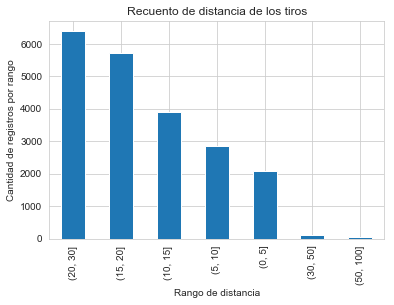

In [12]:
# Creando segmentos de recuento para una variable, en este caso para la distancia a canasta de los lanzamientos, 
# y así ver en que distancias realizó más lanzamientos.
rango = [0, 5, 10, 15, 20, 30, 50, 100]
grafico_segmentacion(df_nba_kobe, 'shot_distance', rango, 'Recuento de distancia de los tiros',\
                     'Rango de distancia', 'Cantidad de registros por rango')

(2, 4]    13045
(0, 2]    12335
(4, 8]      317
Name: period, dtype: int64


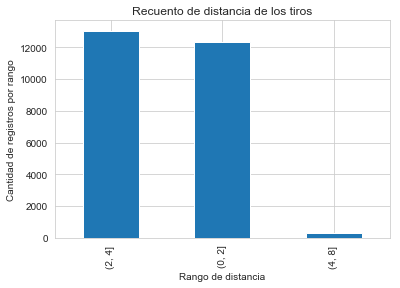

In [13]:
# en este ejemplo graficamos el número de tiros por rango en cuanto al periodo en el cual realiza los tiros, ya 
# sea en los dos primeros cuartos, en la segunda mitad del partido, o en las posibles prórrogas.
# Puede verse como Kobe Bryant realizó más lanzamientos en los dos últimos cuartos de los partidos que en los
# primeros.
rango = [0, 2, 4, 8]
grafico_segmentacion(df_nba_kobe, 'period', rango, 'Recuento de distancia de los tiros',\
                     'Rango de distancia', 'Cantidad de registros por rango')

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64


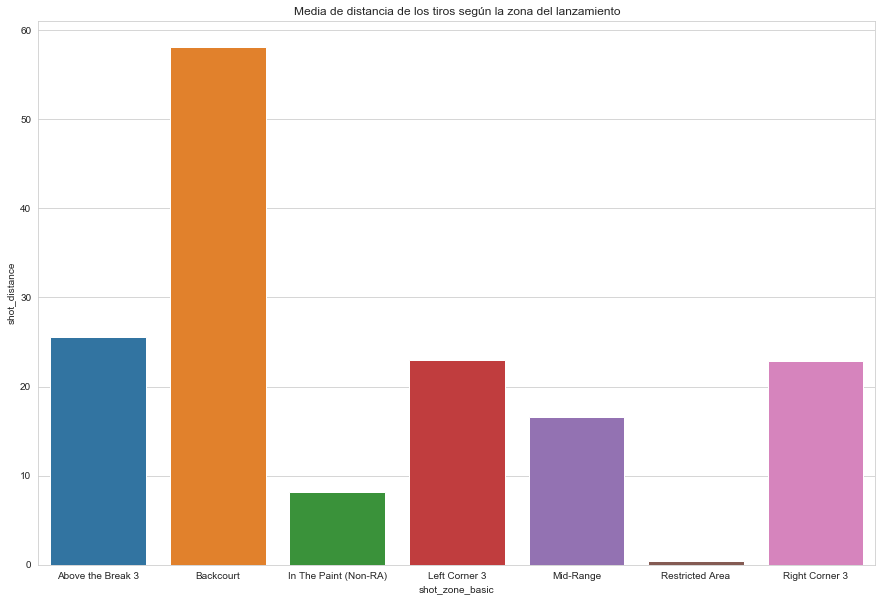

In [14]:
# mostramos los lanzamientos por zona básica de tiro que tiene 7 zonas diferentes. El mayor número de lanzamientos
# fue desde la zona conocida como mid-range que sería la zona media.
# luego mostramos un gráfico donde para cada zona vemos la distancia media a la canasta. La mayor distancia media
# es para la zona "backcourt", que son tiros desde tu propio campo.
grafico_medias(df_nba_kobe, 'shot_zone_basic', 'shot_distance',\
               'Media de distancia de los tiros según la zona del lanzamiento')

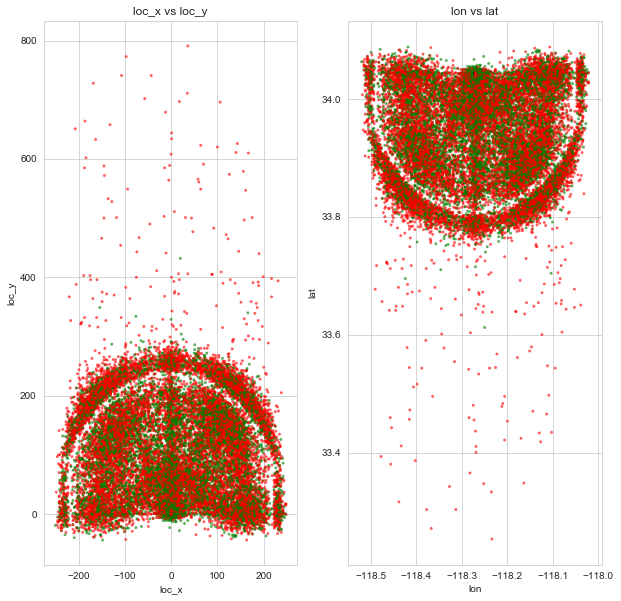

In [15]:
# mostramos dos gráficas con la localización de todos los lanzamientos, tanto acertados como fallados.
grafico_localizacion(10, 10, df_nba_kobe, df_nba_kobe, 'shot_made_flag', 'loc_x', 'loc_y', 'lon', 'lat',\
                     'loc_x vs loc_y', 'lon vs lat')

In [16]:
# creamos dataframe sólo con los errores, y luego otro con sólo los aciertos, para luego pintar gráficas 
# distintas pintando en una solo las canastas por ejemplo.
# puede apreciarse por el número de registros como a lo largo de la carrera del jugador hay más fallos
df_kobe_flag0 = df_nba_kobe[df_nba_kobe['shot_made_flag']==0]
df_kobe_flag0.shape

(14232, 25)

In [17]:
df_kobe_flag1 = df_nba_kobe[df_nba_kobe['shot_made_flag']==1]
df_kobe_flag1.shape

(11465, 25)

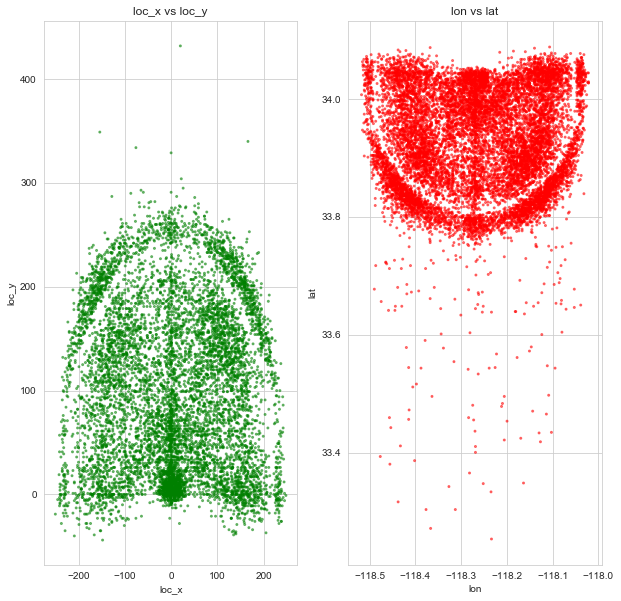

In [18]:
# pintamos por un lado las canastas (color verde) y por otro lado los errores
grafico_localizacion(10, 10, df_kobe_flag1, df_kobe_flag0, 'shot_made_flag', 'loc_x', 'loc_y', 'lon', 'lat',\
                     'loc_x vs loc_y', 'lon vs lat')

Ahora pintamos por un lado las canastas y por otro los errores, teniendo en cuenta la zona del disparo y pintando cada zona de un color diferente en el gráfico en cuestión. 
Hay 3 tipos de categorización de las zonas de lanzamiento:
- Zona área: centro, lado derecho, lado izquierdo...
- Zona básica: zona restringida, media distancia, propia cancha...
- Zona rango: un rango de distintos valores según la distancia a la canasta.

Reparto aciertos:
Center(C)                5933
Right Side(R)            1550
Right Side Center(RC)    1523
Left Side(L)             1243
Left Side Center(LC)     1215
Back Court(BC)              1
Name: shot_zone_area, dtype: int64


Reparto fallos:
Center(C)                5356
Right Side Center(RC)    2458
Right Side(R)            2309
Left Side Center(LC)     2149
Left Side(L)             1889
Back Court(BC)             71
Name: shot_zone_area, dtype: int64


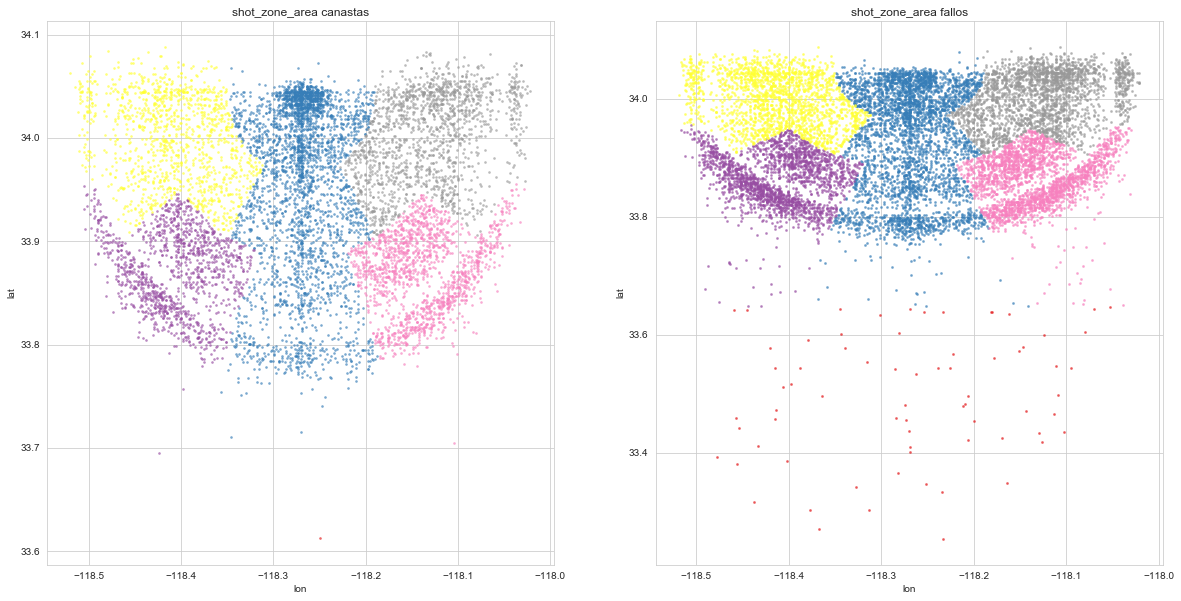

In [19]:
# zona área
grafica_zonas(df_kobe_flag1, df_kobe_flag0, 'shot_zone_area', 20, 10, 'shot_zone_area canastas',\
              'shot_zone_area fallos', 'lon', 'lat', 'lon', 'lat')

Reparto aciertos:
Mid-Range                4279
Restricted Area          3666
In The Paint (Non-RA)    1763
Above the Break 3        1554
Right Corner 3            113
Left Corner 3              89
Backcourt                   1
Name: shot_zone_basic, dtype: int64


Reparto fallos:
Mid-Range                6253
Above the Break 3        3166
Restricted Area          2266
In The Paint (Non-RA)    2117
Right Corner 3            220
Left Corner 3             151
Backcourt                  59
Name: shot_zone_basic, dtype: int64


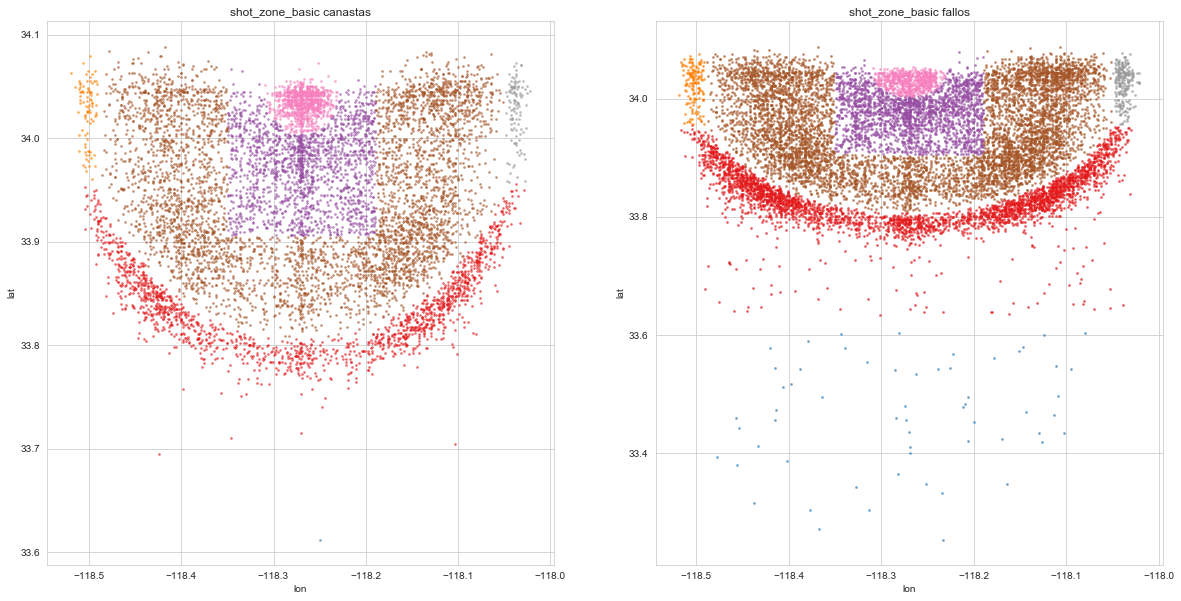

In [20]:
# zona básica
grafica_zonas(df_kobe_flag1, df_kobe_flag0, 'shot_zone_basic', 20, 10, 'shot_zone_basic canastas',\
              'shot_zone_basic fallos', 'lon', 'lat', 'lon', 'lat')

Reparto aciertos:
Less Than 8 ft.    4503
16-24 ft.          2775
8-16 ft.           2430
24+ ft.            1756
Back Court Shot       1
Name: shot_zone_range, dtype: int64


Reparto fallos:
16-24 ft.          4132
24+ ft.            3525
Less Than 8 ft.    3354
8-16 ft.           3150
Back Court Shot      71
Name: shot_zone_range, dtype: int64


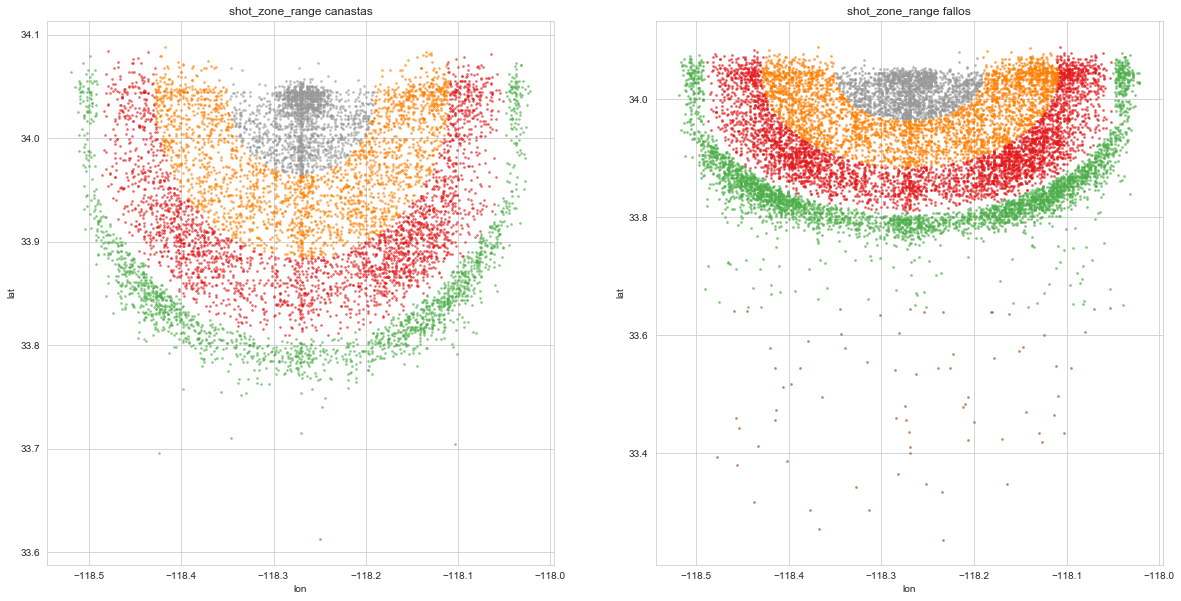

In [21]:
# zona rangos
grafica_zonas(df_kobe_flag1, df_kobe_flag0, 'shot_zone_range', 20, 10, 'shot_zone_range canastas',\
              'shot_zone_range fallos', 'lon', 'lat', 'lon', 'lat')

También podemos utilizar la librería seaborn para hacer otro tipo de visualizaciones, y por ejemplo pintar la cancha con sus dimensiones en el gráfico.

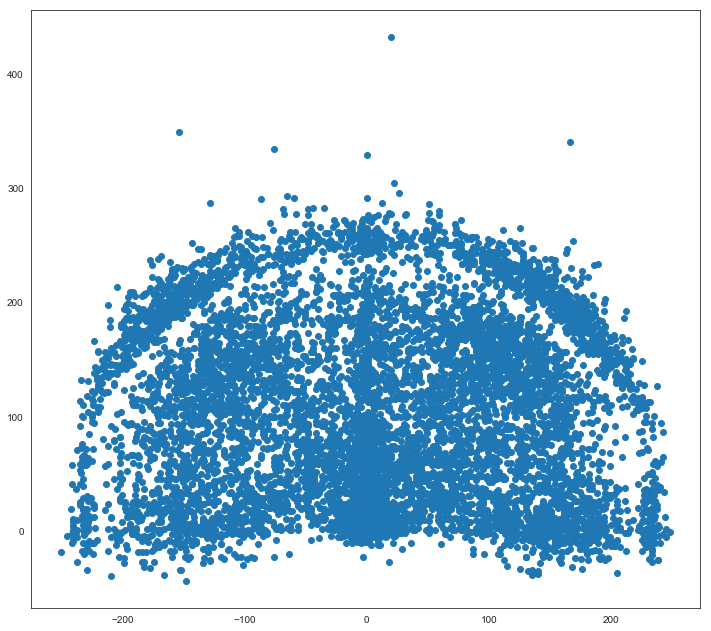

In [22]:
# ejemplo sencillo con seaborn pintando los datos de acierto/canastas
sns.set_style("white")
sns.set_color_codes()

plt.figure(figsize=(12,11))
plt.scatter(df_kobe_flag1.loc_x, df_kobe_flag1.loc_y)
plt.show()

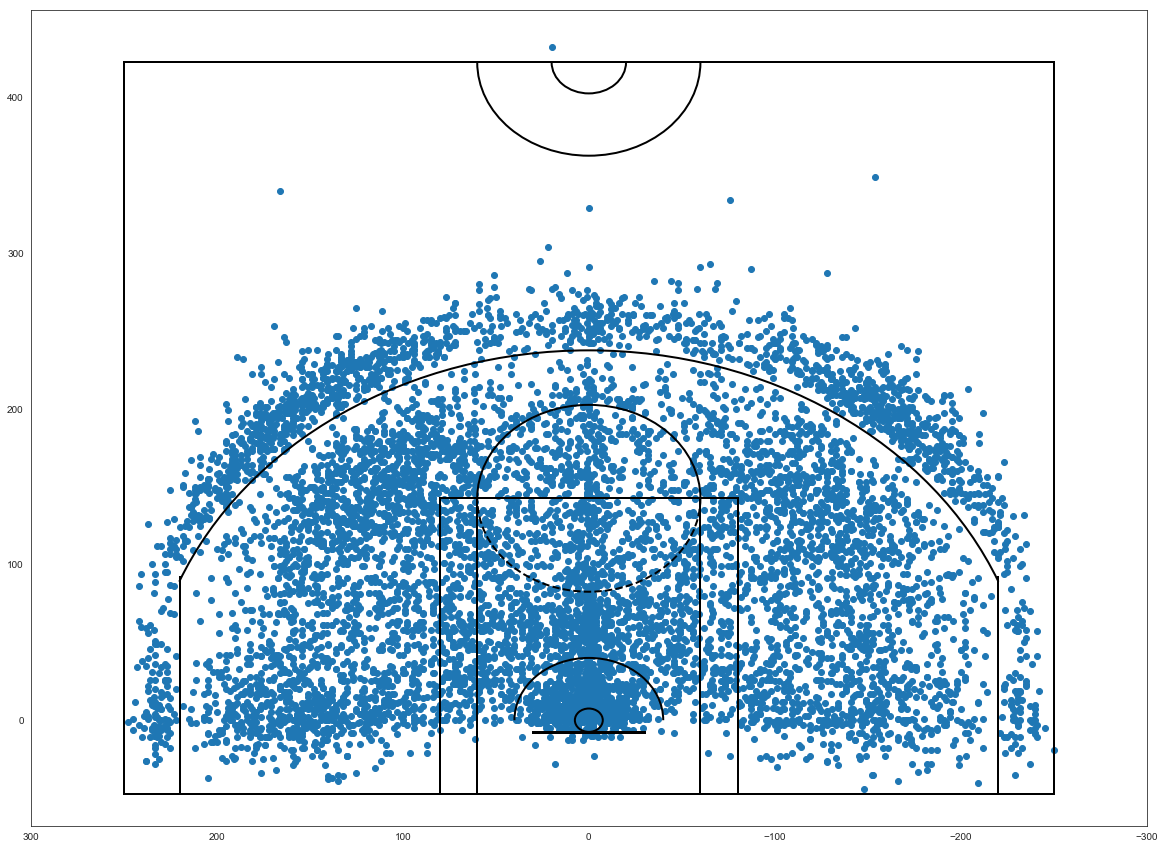

In [23]:
# mismo ejemplo del anterior pero ahora pintando la cancha con la función draw_court() definida arriba
plt.figure(figsize=(20,15))
plt.scatter(df_kobe_flag1.loc_x, df_kobe_flag1.loc_y)

draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.show()

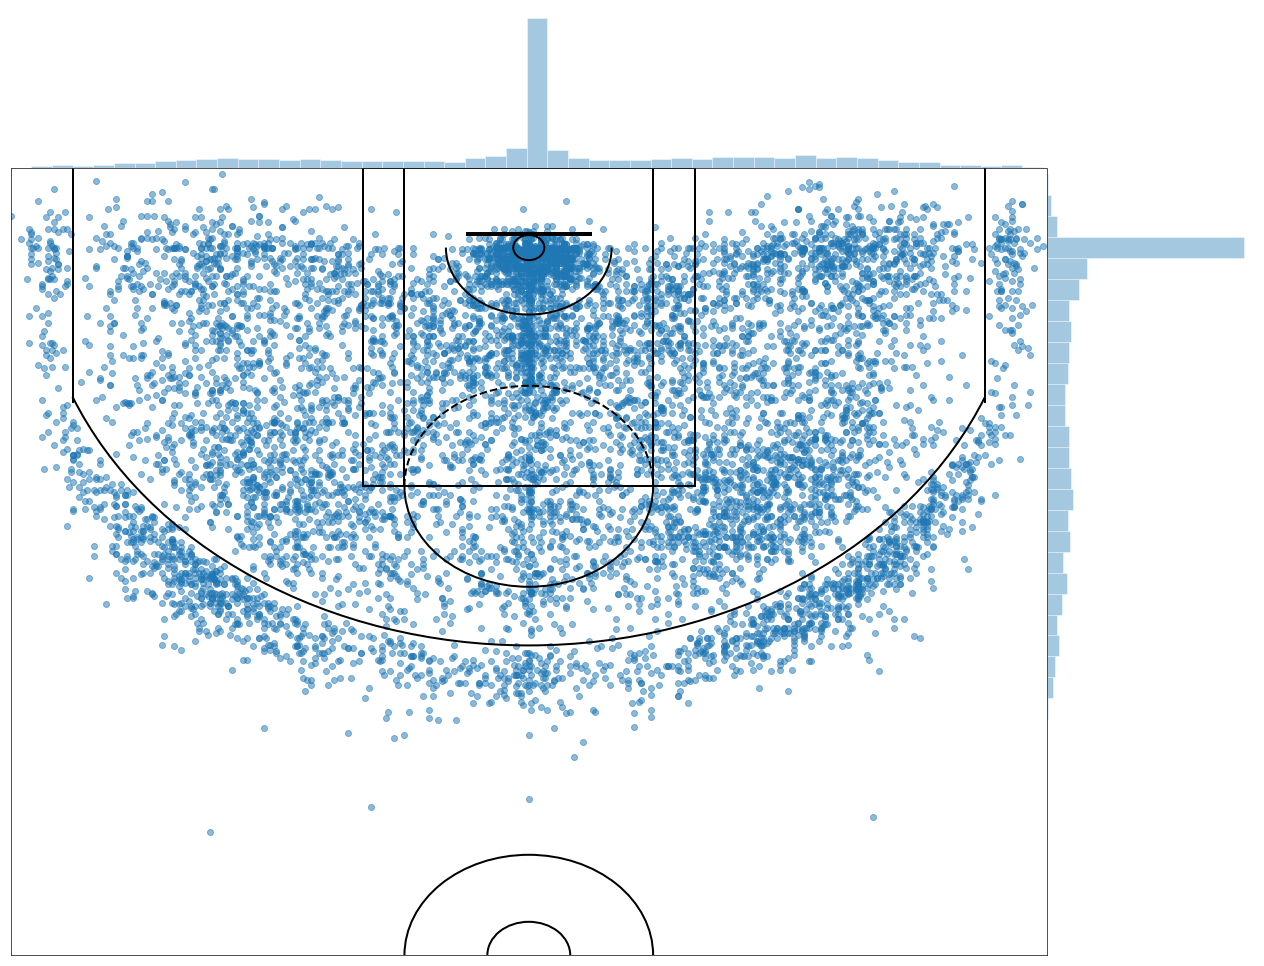

In [24]:
# ahora pintamos gráficas algo más complejas, donde además se pinta en los bordes con barras la cantidad de datos
# según la zona que representa cada barra por su localización x-y.
grafica_seaborn(df_kobe_flag1, 'loc_x', 'loc_y', 'scatter', 20, 15, 'Kobe Bryant FGA', 0, 0)

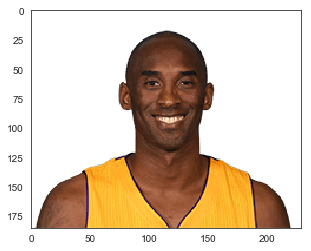

In [25]:
# obtener la imagen del jugador de la web oficial nba stats
img_player = conseguir_imagen("977")

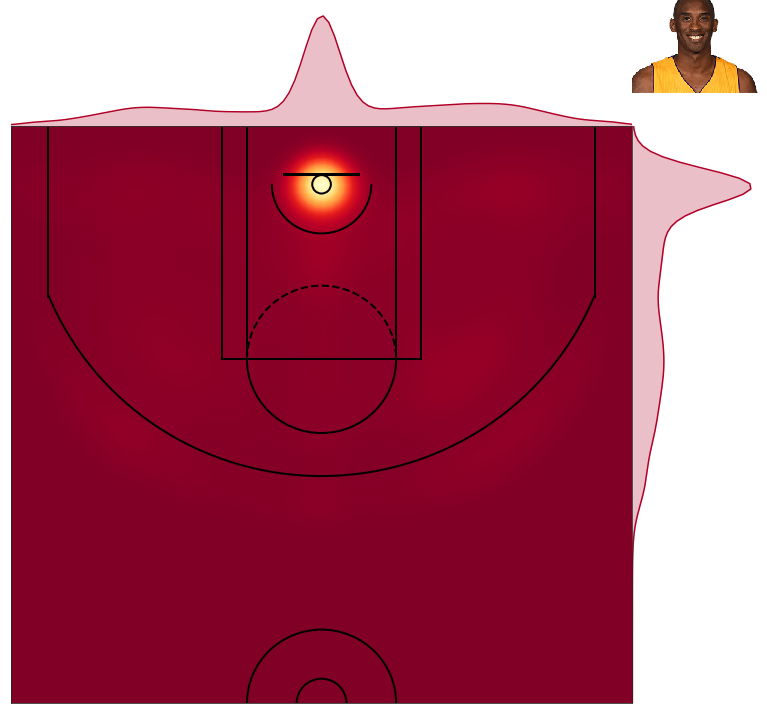

In [26]:
# gráfica de calor donde se aprecia con calor más claro las zonas donde hay mayor número de canastas, y además
# pintamos la imagen del jugador obtenida anteriormente.
cmap=plt.cm.YlOrRd_r

grafica_seaborn(df_kobe_flag1, 'loc_x', 'loc_y', 'kde', 12, 11, 'Kobe Bryant FGA', 1, img_player)

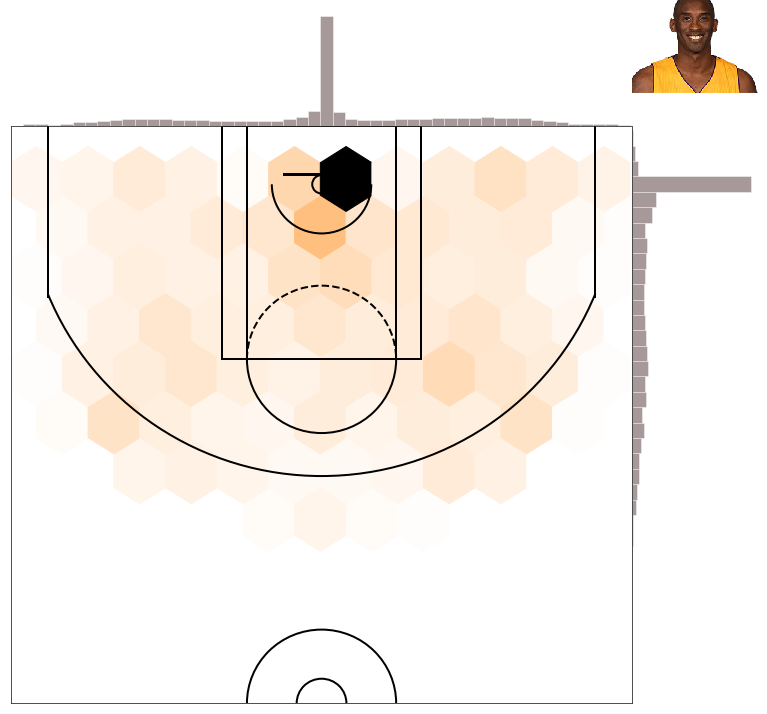

In [27]:
# otro tipo de visualización relacionada con la anterior
cmap=plt.cm.gist_heat_r

grafica_seaborn(df_kobe_flag1, 'loc_x', 'loc_y', 'hex', 12, 11, 'Kobe Bryant FGA', 1, img_player)

En todas las gráficas generadas y datos que se han sacado se puede observar como Kobe Bryant tenía como tiros predilectos y además desde donde más canastas conseguía en las siguientes zonas:
- Cercanías del aro
- Lanzamientos de media distancia (4-5 metros) tanto del lado izquierdo como del derecho, preferiblemente alrededor de ángulos de 45º a la canasta.
- Lanzamientos de triple desde el lado izquierdo y derecho, con el mismo ángulo que en el rango anterior.

Ahora cargamos otros datos, correspondientes a las estadísticas simples de los jugadores este año, y los probamos con otro tipo de posibles visualizaciones.

In [28]:
# cargar dataframe con datos estadísticos
df_nba_game = cargar_datos('NBA_2020_game.csv')

Dataset: num_rows: 525	Columnas: 30

columns:
 ['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year']


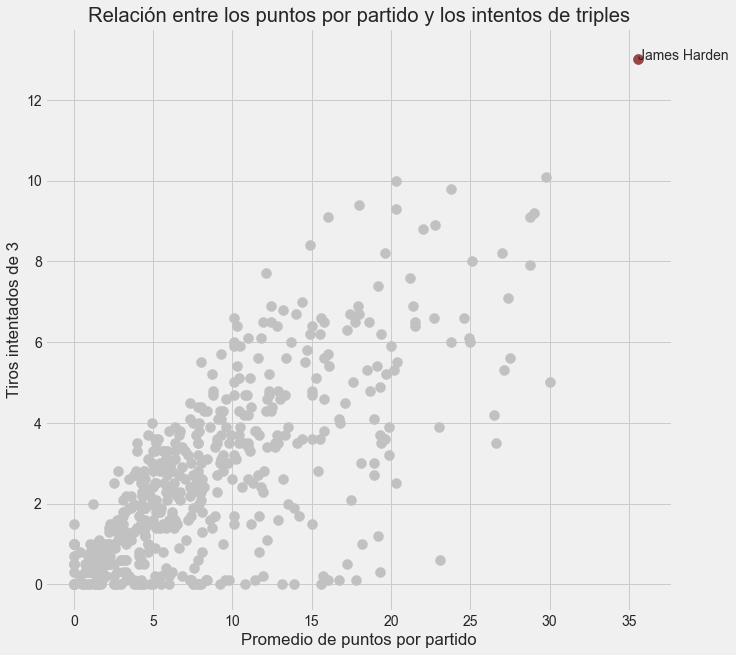

In [29]:
# Ejemplo de visualización viendo la distribución de los jugadores por su promedio de puntos enfrentado al 
# número de intentos de triples, para ver la posible relación.
# En este caso marcamos a James Harden.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 10))
plt.scatter(df_nba_game.PTS, df_nba_game['3PA'], s=100, c="#C1C1C1")

player_series = df_nba_game.loc[df_nba_game.Player == "James Harden"]

plt.scatter(player_series.PTS, player_series['3PA'], s=100, c="#984545")
plt.text(player_series.PTS, player_series['3PA'], s="James Harden")

plt.title("Relación entre los puntos por partido y los intentos de triples")
plt.ylabel("Tiros intentados de 3")
plt.xlabel("Promedio de puntos por partido")

plt.savefig('pts_triples.png', bbox_inches='tight')
plt.show()

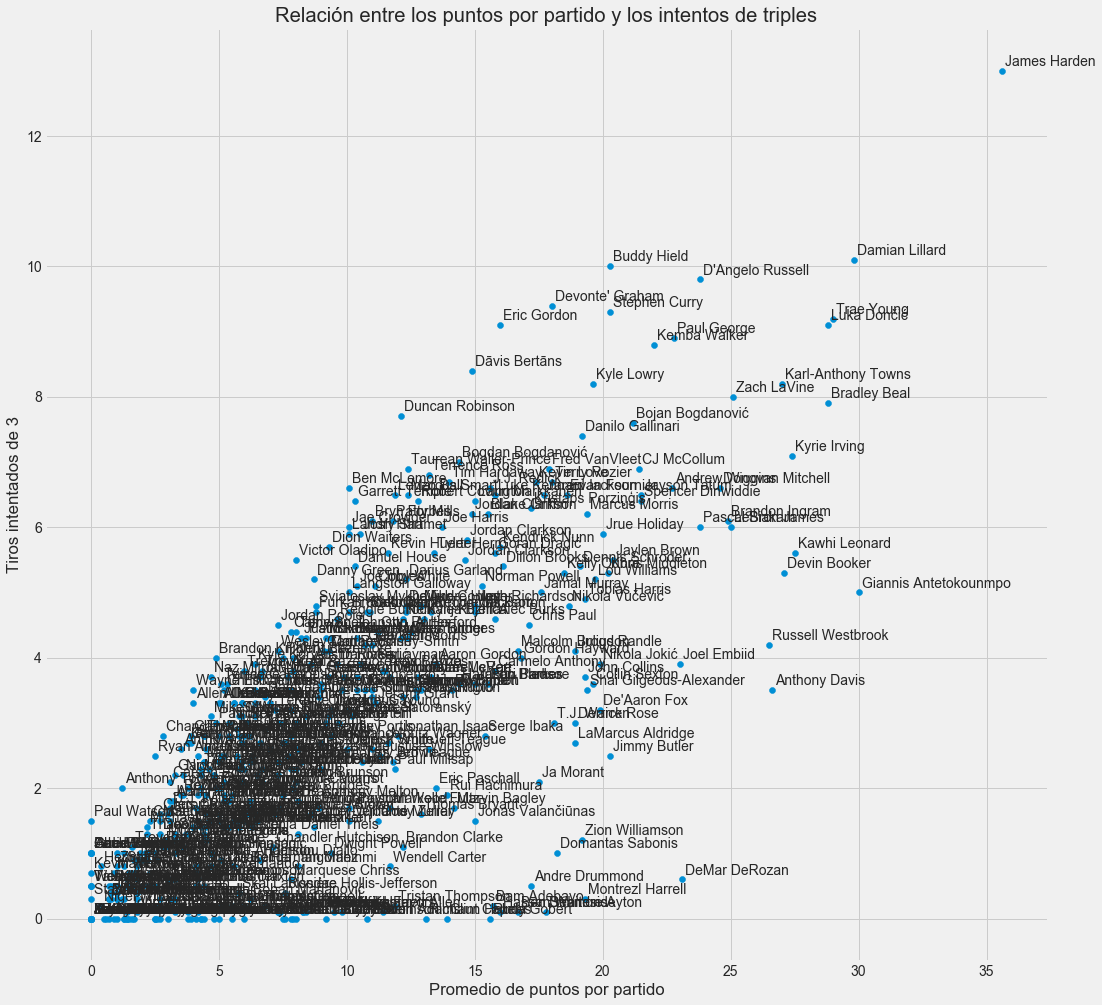

In [30]:
# gráfica con los mismos datos que la anterior pero pintando los nombres de todos los jugadores.
plt.figure(figsize=(16, 16))
plt.scatter(df_nba_game.iloc[:]['PTS'], df_nba_game.iloc[:]['3PA'])

for i in range(len(df_nba_game)):
    xy_text = (3, 5)
    name = df_nba_game.iloc[i]['Player']
    plt.annotate(s= name, xy=(df_nba_game.iloc[i]['PTS'], df_nba_game.iloc[i]['3PA']),\
                 xycoords = "data", textcoords='offset points', xytext=xy_text)
    
plt.xlim()

plt.title("Relación entre los puntos por partido y los intentos de triples")
plt.ylabel("Tiros intentados de 3")
plt.xlabel("Promedio de puntos por partido")

plt.show()

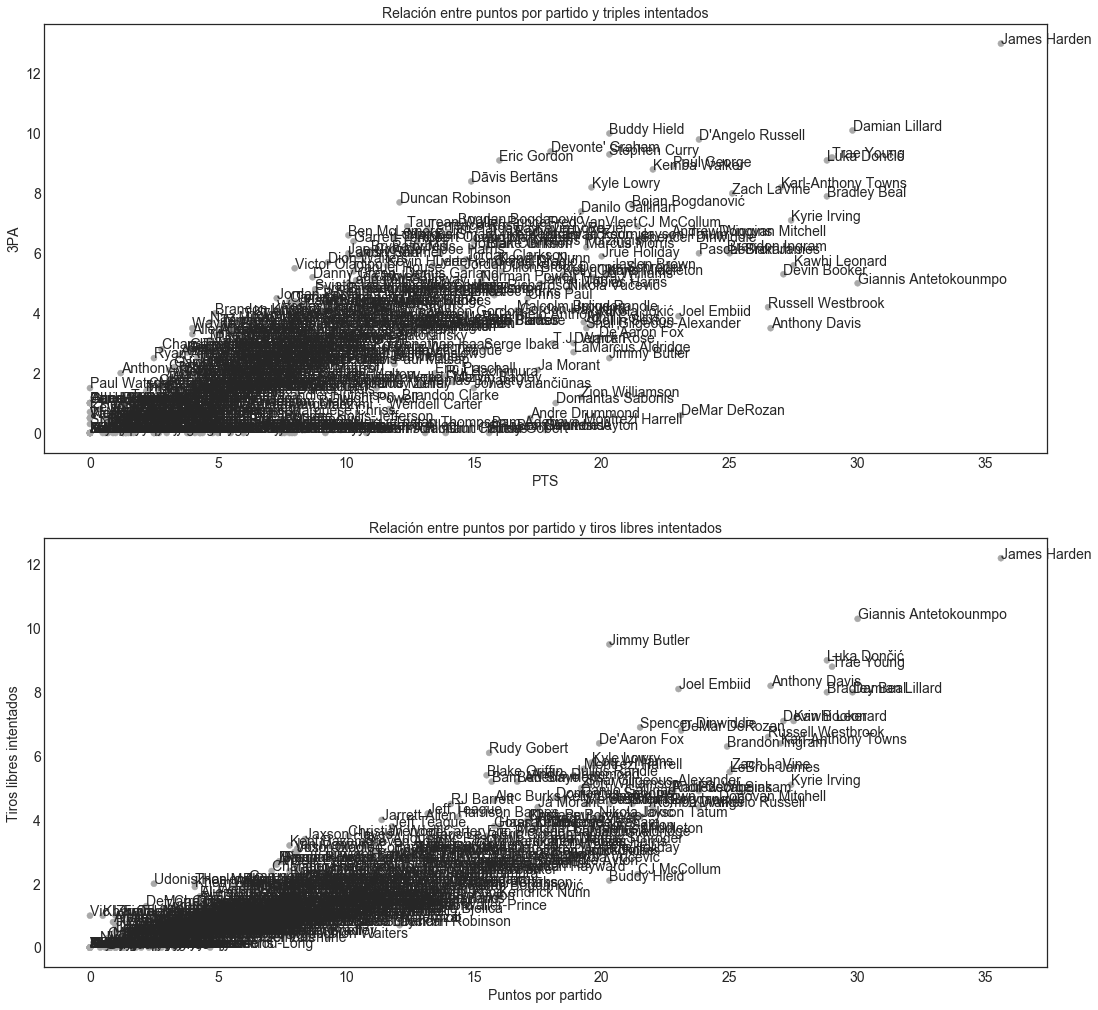

In [31]:
# volvemos a pintar todos los jugadores, esta vez en dos gráficas donde la primera sería relacionando 
# el promedio de puntos con los triples intentados, y la segunda contra los tiros libres intentados.
# Pueden apreciarse casos especiales de jugadores que basan su anotación básicamente en el tiro de 3 como Buddy 
# Hield, que en los triples sale muy arriba y al contrario con los tiros libres; y luego el caso contrario con
# un jugador como Jimmy Butler, que basa más su anotación en penetraciones a canasta y saca más tiros libres.
plt.style.use('seaborn-white')
plt.figure(figsize=(16, 25))

plt.subplot(311)
colors = []

for i in range(len(df_nba_game)):
    plt.text(df_nba_game.iloc[i].PTS, df_nba_game.iloc[i]['3PA'], df_nba_game.iloc[i].Player)
    colors.append("#A9A9A9")

plt.scatter(df_nba_game.PTS, df_nba_game['3PA'], c=colors)

plt.xlabel('PTS', size=14)
plt.ylabel('3PA', size=14)
plt.title('Relación entre puntos por partido y triples intentados', size=14)


plt.subplot(312)
colors = []

for i in range(len(df_nba_game)):
    plt.text(df_nba_game.iloc[i].PTS, df_nba_game.iloc[i]['FTA'], df_nba_game.iloc[i].Player)
    colors.append("#A9A9A9")

plt.scatter(df_nba_game.PTS, df_nba_game.FTA, c=colors)

plt.ylabel('Tiros libres intentados', size=14)
plt.xlabel('Puntos por partido', size=14)
plt.title('Relación entre puntos por partido y tiros libres intentados', size=14)

plt.show()

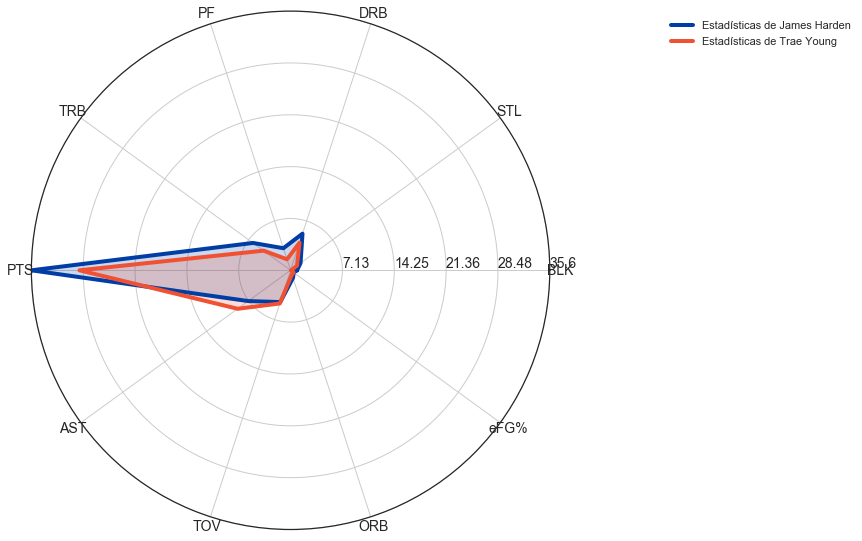

In [37]:
# Ejemplo de gráfica spider enfrentando a James Harden y a Trae Young en una serie de estadísticas:
# puntos, rebotes, tapones, robos, rebotes defensivos, rebotes ofensivos, asistencias, pérdidas, 
# faltas personales, y % de eficiencia global en el tiro.
atributos = ["BLK", "STL", "DRB", "PF", "TRB", "PTS", "AST", "TOV", "ORB", "eFG%"]
grafica_spider_comparacion(df_nba_game, 'James Harden', 'Trae Young', atributos)

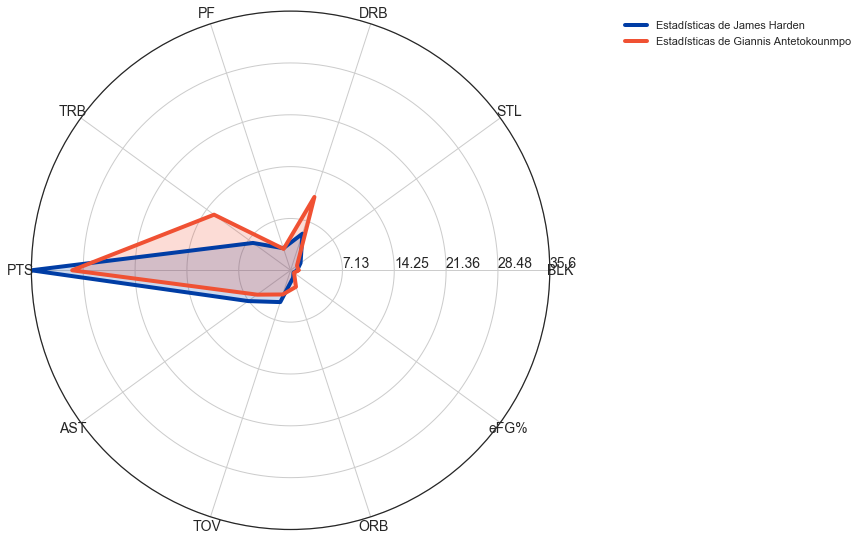

In [38]:
grafica_spider_comparacion(df_nba_game, 'James Harden', 'Giannis Antetokounmpo', atributos)

Cargamos otro dataset con las estadísticas avanzadas, que son más interesantes para este tipo de visualizaciones y por los valores que toman es más sencillo visualmente sacar conclusiones.

In [40]:
# cargar dataframe con datos estadísticos avanzados
df_nba_adv = cargar_datos('NBA_2020_advanced.csv')

Dataset: num_rows: 525	Columnas: 27

columns:
 ['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year']


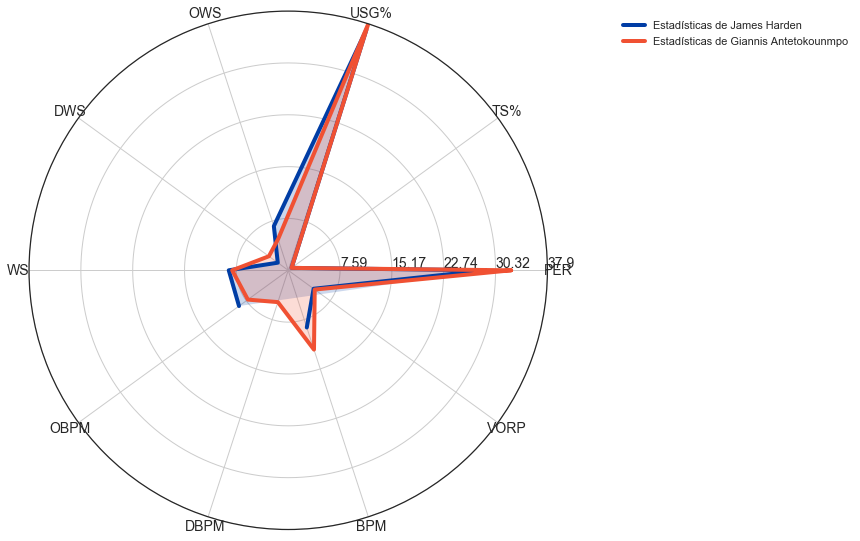

In [41]:
# usamos los atributos avanzados más importantes que identifican la información más relevante de cara a 
# cuantificar el peso de un jugador en las victorias de su equipo, como pueden ser el PER, VORP, el % de uso, o
# los datos defensivos y ofensivos como serían el OWS y DWS que miden el peso del jugador en ataque y defensa
# de las victorias de su equipo.
atributos_adv = ["PER", "TS%", "USG%", "OWS", "DWS", "WS", "OBPM", "DBPM", "BPM", "VORP"]
grafica_spider_comparacion(df_nba_game, 'James Harden', 'Giannis Antetokounmpo', atributos_adv)

Se aprecia como James Harden está por encima en todo excepto en las asistencias si se compara con Trae Young, y en cambio al compararlo con Giannis se nota que son jugadores bastante diferentes y el gráfico que forman sus estadísticas difiere en casi todos los apartados.

Cuando se comparan en las estadísticas avanzadas, se aprecia con claridad como Giannis es bastante más relevante que Harden en los apartados defensivos, y en los ofensivos están más parejos pero algo por encima James Harden.